## Packages and settings

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Exploring data

In [2]:
df = pd.read_csv('../data/ech_apprentissage.csv',sep=';').drop('id',axis=1)
df.describe()

/Users/marfaingchristelle/.pyenv/versions/2.7.12/envs/fairness_2.7.12/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,annee_naissance,annee_permis,puis_fiscale,anc_veh,kmage_annuel,crm,var1,var2,var3,var4,var5,var9,var10,var11,var12,var13,var15,var17,var18,var19,var20,var21,var22,prime_tot_ttc
count,299710.000000,299710.000000,300000.000000,300000.000000,300000.000000,300000.000000,299710.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,1983.682506,2003.048210,6.825267,16.362950,7359.745500,73.551957,12.951790,2.93166,328.478000,1.252957,1.420087,97.793430,170.792927,16.399140,1251.781927,4.238147,1.272070,1.594110,24.710320,0.548223,0.542820,0.911923,1.139417,346.063566
std,6.568576,6.595756,2.650280,24.769884,3085.865577,23.699505,6.595756,1.46540,49.578662,1.656878,0.493573,37.410039,33.720761,24.770057,370.516934,1.020808,1.175831,0.972385,4.518264,1.109302,0.498164,0.283407,1.279835,119.870510
min,1925.000000,1944.000000,0.000000,0.000000,282.000000,50.000000,-2.000000,0.00000,272.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.780000
25%,1980.000000,1999.000000,5.000000,1.000000,6387.000000,50.000000,8.000000,2.00000,272.000000,0.000000,1.000000,71.000000,160.000000,1.000000,1020.000000,3.000000,0.000000,1.000000,22.000000,0.000000,0.000000,1.000000,0.000000,262.050000
50%,1985.000000,2004.000000,6.000000,2.000000,6928.000000,68.000000,12.000000,3.00000,372.000000,1.000000,1.000000,90.000000,175.000000,2.000000,1200.000000,5.000000,1.000000,1.000000,24.000000,0.000000,1.000000,1.000000,1.000000,323.220000
75%,1989.000000,2008.000000,8.000000,32.000000,7464.000000,95.000000,17.000000,4.00000,372.000000,2.000000,2.000000,115.000000,188.000000,32.000000,1393.000000,5.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000,2.000000,407.500000
max,1998.000000,2018.000000,58.000000,99.000000,17000.000000,270.000000,72.000000,5.00000,372.000000,9.000000,2.000000,620.000000,548.000000,99.000000,3211.000000,5.000000,9.000000,5.000000,45.000000,34.000000,1.000000,1.000000,60.000000,1518.810000


In [3]:
columns = pd.DataFrame(data = {'columns_name':df.columns,
                               'unique_values':[len(df[col].unique()) 
                                                for col in df.columns]})

df[columns[columns.unique_values<=10].columns_name.tolist()] = \
     df[columns[columns.unique_values<=10].columns_name.tolist()].astype(str)
    
df[columns[columns.unique_values<=10].columns_name.tolist()].describe()

,energie_veh,var2,var3,var4,var5,var6,var13,var14,var15,var16,var17,var20,var21
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,6,6,2,10,2,5,4,8,10,7,6,2,2
top,gazole,4,372,0,1,B,5,A,0,1,1,1,1
freq,165401,66132,169434,139795,173974,115658,180716,62469,107347,157270,189634,162846,273577


In [4]:
for col in columns[columns.unique_values<=10].columns_name.tolist():
    print df[['annee_naissance',col]].groupby(col).count()

                 annee_naissance
energie_veh                     
NR                           123
electricite                  300
essence                   126025
gazole                    165401
gpl                         7058
hybride essence              803
      annee_naissance
var2                 
0                5266
1               63991
2               53527
3               55386
4               66061
5               55479
      annee_naissance
var3                 
272            130473
372            169237
      annee_naissance
var4                 
0              139660
1               55987
2               55312
3               22321
4                8659
5                8670
6                3450
7                3535
8                 525
9                1591
      annee_naissance
var5                 
1              173793
2              125917
      annee_naissance
var6                 
A               88583
B              115658
C               77203
D         

Hypothesis : Var5 is the sex variable

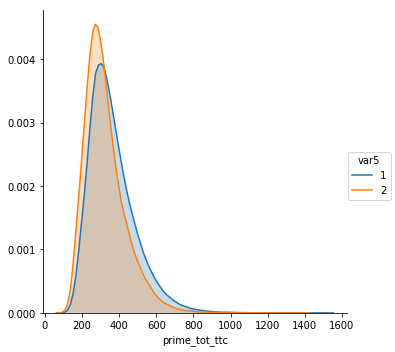

In [50]:
(sns
  .FacetGrid(df, 
             hue='var5', 
             size=5)
  .map(sns.kdeplot, 'prime_tot_ttc', shade=True)
 .add_legend()
)

In [47]:
stats.ks_2samp(df.query('var5 == "1"').prime_tot_ttc, df.query('var5 == "2"').prime_tot_ttc)

Ks_2sampResult(statistic=0.14496700534460066, pvalue=0.0)

As the p-value<0.05 we can reject the null hypothesis : P(Y|sex=1) != P(Y|sex=2)
This contraries the definition of fairness according to the article